<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/stats_textbook_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter5. 정규선형모델


## 5.1 연속형 독립변수가 하나인 모델(단순회귀)

### 5.1.1 분석준비

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리(경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# bear data 생성
# beer = [45.3, 59.3, 40.4, 38.0, 37.0]
# temp = [20.5, 25.0, 10.0, 26.9, 15.8]

# beer = pd.DataFrame({'beer':beer, 'temp':temp})
FOLDER_PATH = '/content/drive/MyDrive/Colab Notebooks/adp/파이썬으로배우는통계학교과서/data/'
beer = pd.read_csv(FOLDER_PATH + '5-1-1-beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


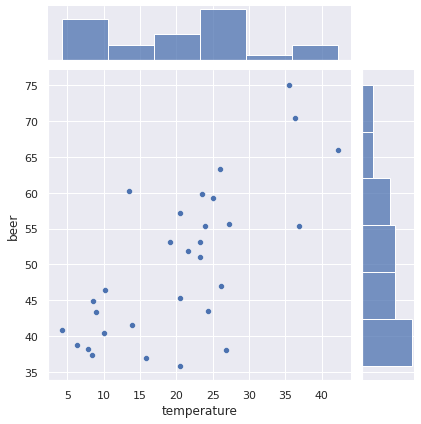

In [4]:
sns.jointplot(x='temperature', y='beer', data=beer)

아래와 같은 맥주 매상 모델을 구축할 것임

$맥주매상 \sim N(\beta_0 + \beta_1 \times 기온, \sigma^2)$

**종속변수**에 맥주매상을, **독립변수**에 기온을 사용한 **정규선형모델**

### 5.1.4 statsmodels를 이용한 모델링

In [5]:
lm_model = smf.ols(formula = 'beer ~ temperature', data=beer).fit()

`sms.ols` 함수를 사용했음. ols 는 Ordinary Least Squares (범용최소제곱법)의 약자

모집단 분포가 정규분포임을 가정했을 때 `최대우도법`의 결과는 `최소제곱법`의 결과와 일치함

모델의 구조를 지정하는 것이 `formual`. "beer ~ temperature"로 지정함으로써 종속변수는 beer, 독립변수가 temperature인 모델을 지정

### 5.1.5 추정 결과 표시와 계수 검정

In [6]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.11e-05
Time:                        14:13:11   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 결과에서 두번째 표에 들어있는 **Intercept와 temperature**만 살펴 보겠습니다.

- coef : 계숫값
- std err : 표준오차
- t : t값
- P>|t| : 귀무가설을 `계수의 값이 0` 이라고 했을 때의 p값, 95% 신뢰구간에서 하측신뢰한계와 상측신뢰한계. p값은 매우 작은 탓에 반올림하여 0이 되었음

기온(temperature)에 대한 계수(0.7654)는 유의미하게 0과 다르다고 판단할 수 있음. 양수이므로 기온이 오르면 맥주 매상도 오른다고 판단할 수 있음

### 5.1.6 summary 함수의 출력 내용 설명

- Deep.Variable : 종속변수의 이름. Deep은 Depended의 약자로, 종속변수라는 의미
- Model, Method : 범용최소제곱법을 사용했다는 설명
- Date, Time : 모델을 추정한 일시
- No.Observations : 샘플사이즈
- Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것
- Df model : 사용된 독립변수의 수
- Covariance Type : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 됨
- R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수 (결정계수는 5.1.12절에서 설명)
- F-statistic, Prob (F-statistic) : 분산분석결과. 분산분석은 5.2절에서 설명
- Log-Likelihood : 최대로그우도
- AIC : 아케이케 정보 기준
- BIC : 베이즈 정보기준, 정보기준의 일종이지만 이 책에서는 사용하지 않음

### 5.1.7 AIC를 이용한 모델 선택

독립변수가 1개 뿐이기에 Null 모델의 AIC와 기온이라는 독립변수가 들어간 모델의 AIC를 비교

Null 모델 구축

In [7]:
null_model = smf.ols('beer ~ 1', data=beer).fit()
null_model.aic

227.94194972563105

독립변수가 있는 모델의 AIC

In [8]:
lm_model.aic

208.90902935575437

AIC 계산 방법 복습

AIC = -2 X (최대로그우도 - 추정된 파라미터 수)

In [9]:
# 추정된 모델의 로그우도
print('추정된 모델의 로그우도:', lm_model.llf)

# 사용된 독립변수의 수
print('사용된 독립변수의 수 :', lm_model.df_model)

# 실제로는 절편(B0)도 추정되었기 때문에 1을 더하면 추정된 파라미터 수를 구할 수 있음
aic = -2 * (lm_model.llf - (lm_model.df_model + 1))
print('aic:', aic)

추정된 모델의 로그우도: -102.45451467787719
사용된 독립변수의 수 : 1.0
aic: 208.90902935575437


**중요**

추정된 파라미터 수에는 몇가지 유형이 있음. 이번에는 **장애모수**를 파라미터 수에 포함시키지 않았지만 이를 포함한 AIC를 구하는 경우도 있음

R언어 등 다른 소프트웨어는 장애모수가 포함되어 있기도 함.

AIC는 그 값이 크고 작음에 의미가 있는 지표.

다시 말해 AIC의 절댓값은 의미가 없음. 같은 유형으로 계산된 AIC는 대소관계가 변하지 않기 때문에 모델 선택에 있어 악영향은 없음

다만 **다른 소프트웨어나 라이브러리에서 계산된 AIC와의 비교는 피해야 함**

예를 들면 파이썬으로 구한 AIC와 R로 구한 AIC의 비교는 의미 없음.

### 5.1.9 seaborn을 이용한 회귀직선 그래프 그리기

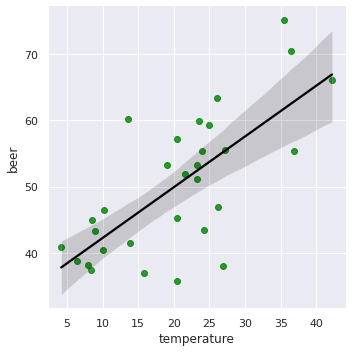

In [10]:
sns.lmplot(x='temperature', y='beer', data=beer , scatter_kws={'color':'green'}, line_kws={'color':'black'})
# 음영 부분은 회귀직선의 95% 신뢰구간을 나타냄

### 5.1.10 모델을 이용한 예측

In [11]:
# predict() 함수에 파라미터를 아무것도 넘기지 않으면 훈련 데이터를 사용한 값이 그대로 출력됨
print(lm_model.predict())

# 기온을 0도 일때의 맥주 매상의 기댓값 계산
print('\n\n기온 0도 일때 맥주매상 기댓값:', lm_model.predict(pd.DataFrame({'temperature':[0]})))

# 0도 일땐 절편(B0)만 있는 것과 같기에 B0 값만 나옴
print('\n\nB0 값(절편):', lm_model.params)

# 기온이 20도일 때의 맥주 매상 기댓값
print('\n\n기온 20도일 때의 맥주매상 기댓값 :', lm_model.predict(pd.DataFrame({'temperature':[20]})))

# 위의 20도 일 때 기대값은 B0 + B1*20 의 계산결과와 같다.
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

print('\n\n계산결과:', beta0 + beta1 * temperature)

[50.301 53.746 42.264 55.2   46.704 37.825 44.943 54.511 52.445 41.116
 54.664 49.23  53.21  52.445 41.04  52.598 45.25  61.783 55.43  50.301
 42.418 50.301 51.143 40.657 66.911 52.904 62.854 41.423 62.472 39.509]


기온 0도 일때 맥주매상 기댓값: 0    34.610215
dtype: float64


B0 값(절편): Intercept      34.610215
temperature     0.765428
dtype: float64


기온 20도일 때의 맥주매상 기댓값 : 0    49.918767
dtype: float64


계산결과: 49.91876701095054


### 5.1.1 잔차 계산
모델의 평가는 주로 잔차를 체크해서 합니다.

정규선형모델의 경우에는 잔차가 '평균이 0인 정규분포'를 따르는 것이므로 모델이 그 분포를 따르고 있는지 체크하게 됩니다.

잔차는 다음과 같이 계산해서 얻을 수 있습니다.

In [12]:
resid = lm_model.resid
print('잔차:', resid.head())

잔차: 0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64


잔차 계산식은 아래와 같음

$residuals = y - \hat{y} \qquad 여기서 \hat{y} = \beta_0 + \beta_1 \times 기온$

잔차는 실제값 - 예측값

In [13]:
y_hat = beta0 + beta1 * beer.temperature
print('\n\n예측값:', y_hat.head())

# 잔차
print('\n\n잔차:', (beer.beer - y_hat).head())



예측값: 0    50.301481
1    53.745905
2    42.264491
3    55.200217
4    46.703971
Name: temperature, dtype: float64


잔차: 0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64


### 5.1.12 결정계수(R2)

결정계수는 가지고 있는 데이터에 대해 모델을 적용했을 때의 적합도를 평가한 지표

$R^2 = \dfrac {\sum_{i=1}^N (\hat{y} - \mu)^2} {\sum_{i=1}^N (y - \mu)^2}$

In [14]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

r2 = np.sum((yhat - mu)**2) / np.sum((y-mu)**2)
print('R2:', r2)

print('모델 R2:', lm_model.rsquared)

R2: 0.503959323061187
모델 R2: 0.5039593230611858


잔차는 residual = y - y_hat 으로 계산할 수 있음.

그러면 식을 변형해서 y = y_hat + residual 라고 할 수 있음.

그리고 결정계수(R2)의 분모는 아래와 같이 분해 가능


$\sum_{i=1}^N (y-\mu)^2 = \sum_{i=1}^N (\hat{y}-\mu)^2 + \sum_{i=1}^N residuals^2$

종속변수값의 변동크기 sum(y - mu)**2 을 모델로 설명 가능한 변동과 모델로 설명하지 못하는 잔차제곱합으로 분해할 수 있다는 겁니다.

이 때문에 결정계수는 전체 변동폭의 크기에 대한 모델로 설명 가능한 변동폭의 비율이라고 해석할 수 있습니다.

In [15]:
# 모델로 설명 가능한 변동과 모델로 설명하지 못하는 잔차제곱합의 합계를 구하겠음
print('모델로 설명 가능한 변동과 설명하지 못하는 잔차제곱합의 합계:', np.sum((yhat - mu)**2) + np.sum(resid**2))

# 위 계산 결과는 데이터 전체 변동의 합과 같음
print('데이터 전체 변동의 합:', np.sum((y - mu)**2))

모델로 설명 가능한 변동과 설명하지 못하는 잔차제곱합의 합계: 3277.114666666669
데이터 전체 변동의 합: 3277.1146666666655


위 코드와 같은 계산 결과가 있어서 결정계수는 아래와 같이도 계산할 수 있음

$R^2 = 1 - \dfrac {\sum_{i=1}^N residuals^2} {\sum_{i=1}^N (y-\mu)^2}$

### 5.1.13 수정 결정계수

독립변수의 수가 늘어나는 것에 대해 패널티를 적용한 결정계수를 **수정된 결정계수**라고 부릅니다.

독립변수가 늘어나면 결정계수는 큰 값이 됨. 결정계수가 높아지는 **과학습**을 일으키기 때문에 조정이 필요함

$R^2 = 1 - \dfrac {\sum_{i=1}^N residuals^2 / (N -s -1)} {\sum_{i=1}^N (y-\mu)^2 \ / (N-1)} \quad s: 독립변수의 수$   

In [16]:
# 파이썬으로 수정결정계수 구하기
n = len(beer.beer)
s = 1
adj_r2 = 1 - ( (np.sum(resid**2)    / (n-s-1) ) / 
               (np.sum((y - mu)**2) / (n-1)   ) )
print('adj_R2:', adj_r2)
print('\n\nmodel adj_r2:', lm_model.rsquared_adj)

adj_R2: 0.48624358459908534


model adj_r2: 0.48624358459908534


### 5.1.14 잔차 그래프

잔차의 특징을 보는 가장 간단한 방법은 잔차의 히스토그램을 그리는 것

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


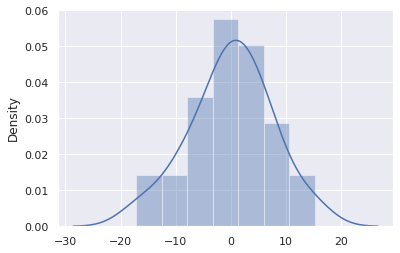

In [17]:
sns.distplot(resid)

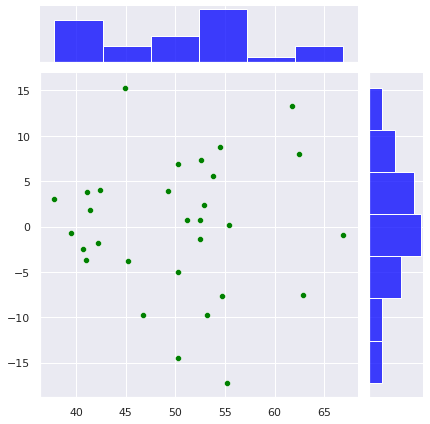

In [18]:
# x축이 적합도, y축이 잔차인 산포도
sns.jointplot(x=lm_model.fittedvalues, y=resid, 
              joint_kws={'color':'green'}, 
              marginal_kws={'color':'blue'})

### 5.1.15 Q-Q 플롯 (QQ플롯)

이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것을 **Q-Q플롯** 이라고 함

Q는 Quantile의 약자.

Q-Q플롯은 `sm.qqplot` 함수를 사용해 그릴 수 있음.

`line="s"` 라고 파라미터를 넘기면 잔차가 정규분포를 따르는 이 선상에 위치한다는 기준을 표시하게 됨

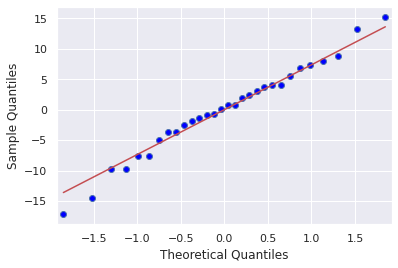

In [19]:
fig = sm.qqplot(resid, line="s")

In [20]:
resid_sort = resid.sort_values()
print('오름차순 정렬된 잔차:', resid_sort.head())

오름차순 정렬된 잔차: 3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64


샘플 사이즈가 30이다. 가장 작은 데이터는 하위 몇%에 속할까? 1 / 31 로 계산하면 됨.

1부터 시작한다는 점에 주의

In [21]:
1/31

0.032

cdf: [0.032 0.065 0.097 0.129 0.161 0.194 0.226 0.258 0.29  0.323 0.355 0.387
 0.419 0.452 0.484 0.516 0.548 0.581 0.613 0.645 0.677 0.71  0.742 0.774
 0.806 0.839 0.871 0.903 0.935 0.968]


ppf: [-1.849 -1.518 -1.3   -1.131 -0.989 -0.865 -0.753 -0.649 -0.552 -0.46
 -0.372 -0.287 -0.204 -0.122 -0.04   0.04   0.122  0.204  0.287  0.372
  0.46   0.552  0.649  0.753  0.865  0.989  1.131  1.3    1.518  1.849]


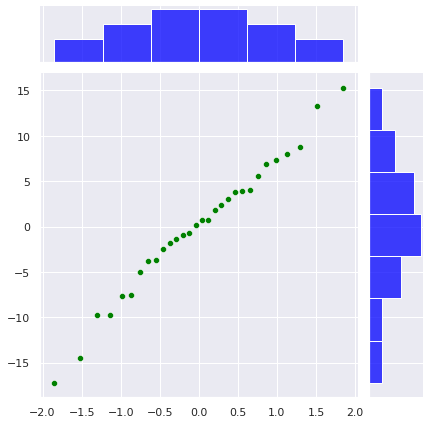

In [22]:
# 30개의 샘플에 위 계산을 함. 이론상의 누적확률이 됨.
nobs = len(resid_sort)
cdf = np.arange(1, nobs+1) / (nobs + 1)
print('cdf:', cdf)


# 이론상의 분위점은 정규분포의 퍼센트포인트를 사용하면 계산할 수 있음
ppf = stats.norm.ppf(cdf)
print('\n\nppf:', ppf)

# 가로축에 이론상의 분위점(ppf), 세로축에 정렬된 데이터(resid_sort)를 지정해서 산포도를 그릴 수 있음
sns.jointplot(x=ppf, y=resid_sort, 
              joint_kws={'color':'green'}, 
              marginal_kws={'color':'blue'})

### 5.1.16 summary 함수의 출력으로 보는 잔차 체크

잔차 체크 결과는 summary 함수의 추정 결과에 출력 됨.

summary 결과의 세번째 표에 주목

In [23]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.11e-05
Time:                        14:13:15   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Prob(Omnibus), Prob(JB) : 잔차의 정규성 검정에 대한 결과
    - 귀무가설 : 잔차가 정규분포를 따른다.
    - 대립가설 : 잔차가 정규분포와 다르다.

정규분포와 다른지 여부를 판단할 때 Skew(왜도)나 Kurtosis (첨도)라는 지표를 사용
- 왜도 : 히스토그램의 좌우 비대칭 방향과 정도를 측정
    - 왜도가 0보다 크면 : 오른쪽 자락이 길어짐

$Skew = E(\dfrac {(x - \mu)^3} {\sigma^3})$
 - E() : 기댓값을 받는 함수
 - x:확률변수 (이 경우는 잔차)

 첨도는 히스토그램 중심부의 뾰족함을 측정하는 지표. 값이 클수록 가운데 부분이 뾰족해짐. 정규분포의 첨도는 3

 $Kurtosis = E( \dfrac {(x - \mu)^4} {\sigma^4})$

 - Durbin-Watson : 잔차의 자기상관을 체크하는 지표. 2 전후라면 문제 없다고 판단할 수 있다.

### 5.2.4 분산분석의 직감적 사고방식 : F비

분산분석의 귀무가설과 대립가설은 아래와 같습니다.
- 귀무가설 : 수준간의 평균값에 차이가 없다.
- 대립가설 : 수준간의 평균값에 차이가 있다.

수진이란 날씨, 물고기의 종류 등과 같은 카테고리형 변수를 가르킴

$F비 = \dfrac {효과의 분산 크기} {오차의 분산 크기}$

효과는 날씨에 따른 매상의 변동, 오차는 날씨라는 변수를 이용해서 설명할 수 없는 맥주 매상의 변동.


**분산분석** : 분산의 비율을 취한 통계량으로 검정을 시행하기 때문에 분산분석이라고 불림. 분사분석은 ANalysis Of VAriance 를 줄여서 **ANOVA** 라고 부르기도 함.

### 5.2.6 분산분석의 직감적 사고방식 : 오차 및 효과의 분리

바이올린 간의 거리가 **효과의 크기**이며, 각 바이올린의 폭이 **오차의 크기**입니다.

![violine_anova](https://user-images.githubusercontent.com/291782/210509036-d5ca2e26-a12c-4902-9d3c-536c4d877c5f.png)


- 각각의 바이올린은 날씨라는 수준으로 나뉘어져 있음
- 바이올린이 떨어져 있다는 것은 날씨에 따라 매상이 크게 변한다는 것을 나타냄
- 때문에 바이올린 간의 거리가 날씨 효과의 크기가 됨
- 같은 날씨라고 해도 매상은 일정하지 않고 흩어져 있음. 날씨로 설명할 수 없는 차이의 크기를 오차의 크기로 표현한 것


- **군간변동** : 바이올린 간의 거리, 즉, 효과의 크기를 군간변동
- **군내변동** : 각 바이올린의 폭, 즉 오차의 크기를 군내변동

### 5.2.9 데이터 작성과 표시

In [24]:
# 샘플 데이터
weather = ['cloudy', 'cloudy', 'rainy', 'rainy', 'sunny', 'sunny']
beer = [6, 8, 2, 4, 10, 12]

weather_beer = pd.DataFrame({'beer':beer, 'weather': weather})
display(weather_beer)

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


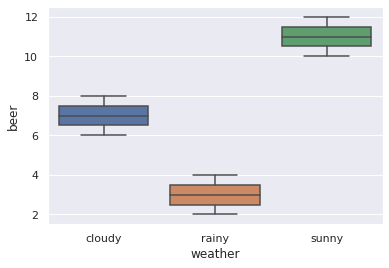

In [25]:
sns.boxplot(x='weather', y='beer', data=weather_beer)

In [26]:
# 날씨별 매상 평균치
print('\n\n날씨별 매상 평균치:', weather_beer.groupby('weather').mean())

# 날씨에 의한 영향 (날씨별 매상 평균치)
effect = [7, 7, 3, 3, 11, 11]

# effect의 흩어진 정도를 구함으로써 군간변동을 구할 수 있음
# 군간변동의 분자에 해당하는 군간 편차제곱합을 계산
# 군간 제곱합
mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect)**2)
print('\n\n군간제곱합:', squares_model)


# 오차는 원본 데이터에서 효과를 빼는 것으로 계산 가능
resid = weather_beer.beer - effect
print('\n\n오차:', resid)

# 마찬가지로 군내 편차제곱합을 구함
# 오차의 평균은 0이라는 점에 주의
# 군내 제곱합
squares_resid = np.sum(resid**2)
print('\n\n군내제곱합:', squares_resid)



날씨별 매상 평균치:          beer
weather      
cloudy    7.0
rainy     3.0
sunny    11.0


군간제곱합: 64.0


오차: 0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64


군내제곱합: 6


### 5.2.11 분산분석(2) : 군간 분석과 군내 분산 계산

분산분석에서도 군간, 군내 분석을 계산할 때는 단순히 샘플 사이즈를 사용하지 않고, **자유도**라 불리는 값으로 나누어야함

- 군간변동의 자유도 : 수준의 종류에 따라 좌우됨
    - 흐림, 맑음, 비 3가지 수준이 있음. 거기서 1을 빼면 군간변동의 자유도는 2가 됨
- 군내변동의 자유도 : 샘플사이즈와 수준의 종류에 따라 좌우됨
    - 샘플사이즈가 6, 수준이 3가지이므로 6-3 = 3이 군내변동 자유도

In [27]:
df_model = 2 # 군간변동의 자유도
df_resid = 3 # 군내변동의 자유도

# 군간 평균제곱(분산)
variance_model = squares_model / df_model
print('군간 평균제곱(분산):', variance_model)

# 군내 평균제곱(분산)
variance_resid = squares_resid / df_resid
print('군내 평균제곱(분산):', variance_resid)

# F비 (군간 분산과 군내 분산의 비로 계산)
f_ratio = variance_model / variance_resid
print('\n\nF_ratio:', f_ratio)

# p 값은 F분포의 누적분포함수에서 계산할 수 있음
# sp.stats.f.cdf 함수를 사용
# 파라미터로는 F비와 2개의 자유도, 총 3개를 넘김
p = 1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)
print('\n\np value:', p)

print('p value가 0.05 이하가 됐으므로 날씨에 의해 매상이 유의미하게 변화한다고 판단할 수 있음.')

군간 평균제곱(분산): 32.0
군내 평균제곱(분산): 2.0


F_ratio: 16.0


p value: 0.02509457330439091
p value가 0.05 이하가 됐으므로 날씨에 의해 매상이 유의미하게 변화한다고 판단할 수 있음.


In [28]:
# statsmodels 를 이용한 분산분석
anova_model = smf.ols('beer ~ weather', data=weather_beer).fit()
display(sm.stats.anova_lm(anova_model, typ=2))

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


`sm.stats.anova_lm` 함수의 결과로 출력된 표의 형식을 **분산분석표**라고 함.
- sum_sq : 군간과 군내의 편차제곱 합
- df : 자유도
- F : F비
- PR(>F) : p value

**정리**
- 분산분석에서는 데이터를 효과의 크기와 오차의 크기로 분리
- 효과의 크기를 **군간변동**
- 오차의 크기를 **군내변동**
- 군간분산과 군내분산의 비율, 즉 F비를 통계량으로 사용
- 모집단이 **등분산 정규분포**를 따를 때 F비는 F분포를 따른다는 것이 밝혀져 있기 때문에, 누적분포함수에서 p값을 계산하고, 그 값이 0.05 이하인지 판정

### 5.2.17 모델의 계수 해석

In [29]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

$맥주매상 \sim N(\beta_0 + \beta_1 \times 비 + \beta_2 \times 맑음, \sigma^2)$

위 식을 대응하면
- Intercept : B0에 해당 (절편)
    - 그러므로 흐린날의 매상 평균은 7이 됨. 
    - 비오는날 : weather[T.rainy] : 7 - 4 = 3 (매상의 기댓값)
    - 맑은날 : weather[T.sunny] : 7 + 4 = 11 (매상의 기댓값)

### 5.2.18 모델을 사용해서 오차와 효과 분리하기

In [30]:
# 각 수준의 평균값(예측치)
fitted = anova_model.fittedvalues
print('예측치:', fitted)

resid = anova_model.resid
print('\n\n잔차:', resid)

예측치: 0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64


잔차: 0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64


### 5.2.19 회귀모델의 분산분석

분산분석은 일반선형모델에서 일반적으로 사용할 수 있음.

이는 독립변수가 연속형 데이터여도 변함없음

In [31]:
beer = pd.read_csv(FOLDER_PATH + '5-1-1-beer.csv')
display(beer.head())

# 모델추정
lm_model = smf.ols(formula='beer ~ temperature', data=beer).fit()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


독립변수(기온)가 카테고리형 변수라고 해도 모델의 적용값과 잔차를 사용해서 F비를 계산할 수 있음

F비를 구하기 전에 자유도를 먼저 정의

독립변수가 연속형 데이터인 경우에는 군간변동, 군내변동이라는 용어를 사용하지 않음

- 군간변동의 자유도 대신 **모델의 자유도** (파라미터 수(절편, 기울기 즉 2개) - 1) = 1 라고 함
- 군내변동의 자유도 대신 **잔차의 자유도** (샘플사이즈(30) - 파라미터수(2))라고 함

In [32]:
param_n = len(lm_model.params)
param_n
sample_n = len(beer)
sample_n

30

In [33]:
df_lm_model = param_n - 1 # 모델의 자유도 (파라미터수 -1) > ((절편, 기울기) - 1)
df_lm_resid = sample_n - param_n # 잔차의 자유도 (샘플사이즈 - 파라미터수) > (30 - 2)
print('모델의 자유도:', df_lm_model)
print('잔차의 자유도:', df_lm_resid)

모델의 자유도: 1
잔차의 자유도: 28


In [34]:
# F비 계산

# 모델들 적용한 값
lm_effect = lm_model.fittedvalues
print('모델 적용값:', lm_effect)

lm_resid = lm_model.resid
print('잔차:', resid)

mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect - mu)**2)
variance_lm_model = squares_lm_model / df_lm_model
print('\n\n적용값 평균:', mu)
print('제곱값:', squares_lm_model)
print('분산:', variance_lm_model)

# 잔차의 크기
squares_lm_resid = np.sum((lm_resid)**2)
variance_lm_resid = squares_lm_resid / df_lm_resid
print('\n\n잔차의제곱:', squares_lm_resid)
print('잔자츼 분산:', variance_lm_resid)

# F비
f_value_lm = variance_lm_model / variance_lm_resid
print('\n\nF ratio:', f_value_lm)

모델 적용값: 0     50.301481
1     53.745905
2     42.264491
3     55.200217
4     46.703971
5     37.825011
6     44.943488
7     54.511333
8     52.444678
9     41.116350
10    54.664418
11    49.229882
12    53.210106
13    52.444678
14    41.039807
15    52.597764
16    45.249659
17    61.782895
18    55.429846
19    50.301481
20    42.417577
21    50.301481
22    51.143451
23    40.657093
24    66.911259
25    52.903935
26    62.854493
27    41.422521
28    62.471779
29    39.508952
dtype: float64
잔차: 0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64


적용값 평균: 50.186666666666696
제곱값: 1651.53248900722
분산: 1651.53248900722


잔차의제곱: 1625.5821776594491
잔자츼 분산: 58.05650634498033


F ratio: 28.446983688504613


In [35]:
# F비 구하기
 # import statsmodels.api as sm
import statsmodels.api as sm
f_rto = sm.stats.anova_lm(lm_model, typ=2)
print('F ratio:', f_rto)

print(lm_model.summary)

F ratio:                   sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN
<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f9186de92e0>>


## 5.3 독립변수가 여럿인 모

매상 예측 모델에서는 **습도, 기온, 날씨(맑음 또는 비), 가격** 이라는 독립변수를 사용

- 날씨 : 카테고리형 변수
- 나머지 : 연속형 변수

이 절에서는 **분산분석**에서 Type II ANOVA라 불리는 검정방법을 배우겠음

복수의 독립변수가 있을 경우 분석 방법

In [36]:
sales = pd.read_csv(FOLDER_PATH + '5-3-1-lm-model.csv')
sales.head(3)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy


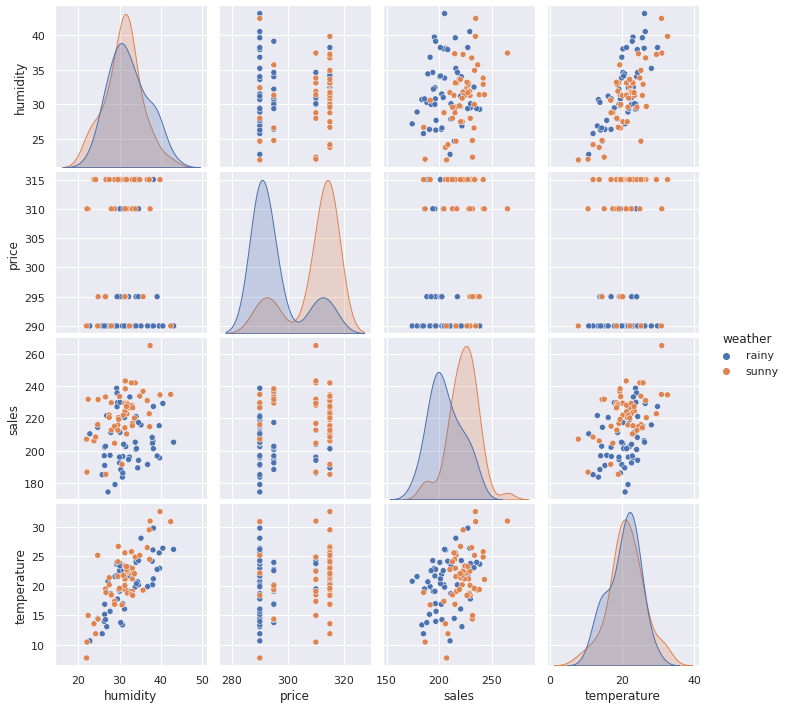

In [37]:
# sns.pairplot(data=sales, hue='weather', palette='gray')
sns.pairplot(data=sales, hue='weather')

### 5.3.5 복수의 독립변수를 가지는 모델

독립변수가 4개 다 들어간 모델을 추정하겠음

독립변수를 + 기호를 연결하여 복수의 독립변수를 모델에 포함시킬 수 있음

In [38]:
# 복수의 독립변수를 가진 모델을 추정
lm_sales = smf.ols('sales ~ weather + humidity + temperature + price',
                   data=sales).fit()

# 추정된 결과
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

가격(price) 계수가 - (마이너스) 라는 점에 주목.

가격이 오르면 매출이 떨어진다는 의미

### 5.3.6 나쁜 분석 예 : 일반적인 분산분석으로 검정하

`typ=1` 파라미터를 넘기면 일반적인 분산분석이 됨

**Type 1 ANOVA** 라고도 부름

In [39]:
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


- 위 검정결과를 보면 모든 독립변수가 유의미한 것처럼 되어 있음
- 하지만 이 결과는 틀렸음
- Type 1 ANOVA는 독립변수를 넣는 순서를 바꾸면 검정결과가 바뀜

정말 그런지 확인을 위해 독립변수 순서를 변경해서 테스트

In [40]:
# 독립변수 순서를 바꿈
lm_sales_2 = smf.ols('sales ~ weather + temperature + humidity + price',
                     data=sales).fit()

# 검정결과
print(sm.stats.anova_lm(lm_sales_2, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


- 기온(temperature)과 습도(humidity)를 바꿈
- 2번째 모델에서 습도의 p 값이 0.6정도로 매상에 유의미한 영향을 끼치지 않는다는 결과가 되었음

### 5.3.7 회귀계수의 t검

분산분석 대신 회귀계수의 **t검정**을 하면 앞서와 같은 문제는 발생하지 않음

계수와 검정결과만 표시해 보겠음

In [44]:
 # 모델1 의 결과
display(lm_sales.summary().tables[1])

print('\n\n\n독립변수 순서를 변경한 모델2의 결과과 t검정에서는 1과 동일하다')
# 독립변수 순서를 변경한 모델2의 결과
display(lm_sales_2.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021





독립변수 순서를 변경한 모델2의 결과과 t검정에서는 1과 동일하다


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


### 5.3.8 Type 2 ANOVA

독립변수를 넣는 순서를 바꾸어도 검정 결과가 변하지 않는 분산분석을 Type 2 ANOVA라고 함.

### 5.3.10 Type 2 ANOVA 와 수정제곱

Type 1 ANOVA는 아래와 같이 **잔차제곱합**을 비교함
- 모델0 : 매상 ~&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+ 잔차제곱합
- 모델1 : 매상 ~ 날씨&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+ 잔차제곱합
- 모델3 : 매상 ~ 날씨 + 습도 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+ 잔차제곱합
- 모델4 : 매상 ~ 날씨 + 습도 + 기온 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+잔차제곱합
- 모델5 : 매상 ~ 날씨 + 습도 + 기온 + 가격 + 잔차제곱합



Type 2 ANOVA는 아래와 같인 **잔차제곱합**을 비교함
- 모델0 : 매상 + 날씨 + 습도 + 기온 + 가격 + 잔차제곱합
- 모델1 : 매상 ~&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;습도 + 기온 + 가격 + 잔차제곱합
- 모델2 : 매상 ~ 날씨&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+ 기온 + 가격 + 잔차제곱합
- 모델3 : 매상 ~ 날씨 + 습도&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+ 가격 + 잔차제곱합
- 모델4 : 매상 ~ 날씨 + 습도 + 기온&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+잔차제곱합

Type 2 ANOVA는 독립변수가 줄어들면서 증가하는 잔차제곱합의 크기에 기반해서 독립변수가 갖는 효과의 크기를 정량화하고 있다고 생각하면 알기 쉽습니다. 이 방법으로 계산된 군간 편차제곱합을 **수정제곱합**이라고 부릅니다.

### 5.3.11 Type 2 ANOVA (실습)

수정제곱합을 계산해 보겠음

In [45]:
# 모든 변수가 포함된 모델의 잔차제곱합
mod_full = smf.ols('sales ~ weather + humidity + temperature + price',
                   data=sales).fit()

resid_sq_full = np.sum(mod_full.resid ** 2)
print('잔차제곱합:', resid_sq_full)

잔차제곱합: 17242.71694236648


In [46]:
# 습도만 제거한 모델의 잔차제곱합
mod_non_humi = smf.ols('sales ~ weather + temperature + price',
                   data=sales).fit()

resid_sq_non_humi = np.sum(mod_non_humi.resid ** 2)
print('잔차제곱합 (습도만 제거):', resid_sq_non_humi)

잔차제곱합 (습도만 제거): 17299.142016107664


In [47]:
# 잔차제곱합 차이
resid_sq_non_humi - resid_sq_full

56.42507374118213

`sum_sq`열의 `humidity`를 보면 위에서 계산한 결과와 같다는 것을 알 수 있음

In [48]:
print(sm.stats.anova_lm(mod_full, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


습도의 `sum_sq` 값이 위에서 계산한 결과(56.425)와 같고 `p value` 가 0.578이라서 유의미한 영향을 끼치고 있다고 볼수 없다는 결과를 얻음

### 5.3.14 AIC를 이용한 변수 선

AIC를 비교해 보겠음

In [49]:
print('모든 변수를 포함한 모델 AIC:', mod_full.aic.round(3))
print('습도를 제외한 모델 AIC:', mod_non_humi.aic.round(3))

모든 변수를 포함한 모델 AIC: 808.785
습도를 제외한 모델 AIC: 807.112


습도를 제외한 AIC가 더 작기에, 습도를 제외하는 것이 맞음